# Twitter Text Sentiment Analysis: Correlation of London's neighborhoods sentiment analysis
### Computational Data Analysis, Tomer Eldor

In this project I'm quering twitter using Twitter's API and analyzing the retrieved data. I chose input a selected list of neighborhoods of interest in London, and query each one of them in turn, retrieving all the posts which explicitly contained the neighorhood's name, and inspect their sentiment analysis. I chose to query explicity neighborhoods names rather than rely on the geolocation from two reasons:
1. Only ~1% of twitter posts are geo-tagged, and they are usually correlated with specific user traits, so that will be a very small and biased sample (16. Sloan L, Morgan J, Housley W, Williams M, Edwards A, Burnap P, et al. (2013) Knowing the Tweeters: Deriving sociologically relevant demographics from Twitter. Sociological Research Online 18(3), article number: 7. (doi: 10.5153/sro.3001)
2. By tweeting from any location, there is only a small chance the tweet will be *about* something related to the location itself. Conversely, by querying for the neighorhood's name, you can more accurately capture only tweets that say something *about* the neighborhood itself. It could be a complaint, a brag or graditute, or just a mention of "going out in Shoreditch tonight!"; but even those could be interpreted with sentiment (positive in this instance) and thus contain valuable information as for what do the users seem to think / feel about the place.

Code inspired by: 
- https://github.com/shadab-entrepreneur for twitter scraping API Client
- https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/ for sentiment analysis


# Set Up

In [4]:
# Importing libraries
# General data analysis/formatting libraries
import re  
import json
import pandas as pd
import numpy as np
from datetime import date
from textblob import TextBlob # for sentiment analysis

# Twitter Packages
# import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

print("Done importing packages")

Done importing packages


# Setting Up API Client

In [5]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class for initializing and accessing the twitter API 
        using our authentication and analyzing the tweets.
        Set your individual twitter API keys to replicate this analysis
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'Ue6lPHym1DacsbQtFPaFdjUgz'
        consumer_secret = 'yO096IxLzAxkEy2sSpZAJZU1F1hV1MP3lo4xeUfrc8ex71MjK5'
        access_token = '1042063897073733632-E9YhTYt11vut5OWUXUPUGujiAZbAcG'
        access_token_secret = 'R3ResgToyI5JV8KViGBXGqzgUappMDlcSFc1uEdwnXqIc'
        
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            # if doesn't work, show authentication error
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet, textual=0): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method - built on top of NLTK
        '''
        # create TextBlob object of passed tweet text 
        # TextBlob is an automatic text sentiment analysis package in python
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment text
        # polarity is the "score" of positivity, 
        # where 0 is neutral, above 0 is positive and below is negative
        if textual == 0:
            return analysis.sentiment.polarity
        # alternatively we could return textual answer immediately
        elif textual == 1:
            polarity = analysis.sentiment.polarity
            if polarity > 0: return 'positive'
            elif polarity == 0: return 'neutral'
            else: return 'negative'
  
    def get_tweets(self, query, max_count = 200, textual_bool=0): 
        ''' 
        General function for fetching tweets 
        and parsing them using previous utility functions
        Inputs:
            query: text to use as the search query in searching for tweets.
                    the output will be the resulting tweets with that keyword in the query.
            max_count = 200: how many maximum tweets to retreive
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 

            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = max_count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['Text'] = tweet.text 
                # saving sentiment of tweet from previously defined function
                # parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
                parsed_tweet['Polarity'] = self.get_tweet_sentiment(tweet.text, textual=textual_bool) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  

In [62]:
## Querying Twitter

In [63]:
# I saved a list of london neighborhoods here
# from: https://www.wikiwand.com/en/List_of_areas_of_London
with open('London_Neighborhoods.txt') as inputfile: 
    london_neighborhoods = [line.strip() for line in inputfile]
london_neighborhoods

['Abbey Wood',
 'Acton',
 'Aldgate',
 'Alexandra Palace/Park',
 'Anerley',
 'Archway',
 'Balham',
 'Barbican',
 'Barking',
 'Barnes',
 'Barnsbury',
 'Battersea',
 'Bayswater',
 'Beckenham',
 'Beckton',
 'Belgravia',
 'Bellingham',
 'Belsize Park',
 'Bermondsey',
 'Bethnal Green',
 'Bishopsgate',
 'Blackfriars',
 'Blackheath',
 'Bloomsbury',
 'Borough',
 'Bow',
 'Brent Cross',
 'Brixton',
 'Brockley',
 'Bromley by Bow',
 'Brompton',
 'Brondesbury Park',
 'Camberwell',
 'Camden Town',
 'Canning Town',
 'Canonbury',
 'Castelnau',
 'Catford',
 'Charlton',
 'Chelsea',
 'Chingford',
 'Chislehurst',
 'Chiswick',
 'City of London',
 'Clapham',
 'Clapham Junction',
 'Clapton',
 'Clerkenwell',
 'Colindale',
 "Collier's Wood",
 'Cottenham Park',
 'Covent Garden',
 'Cricklewood',
 'Crofton Park',
 'Crouch End',
 'Croydon',
 'Crystal Palace',
 'Dalston',
 'Deptford',
 'Docklands',
 'Dollis Hill',
 'Dulwich',
 'Ealing',
 "Earl's Court",
 'Earlsfield',
 'East Dulwich',
 'East Finchley',
 'East Ham',


In [64]:
from datetime import date

df_total = pd.DataFrame(columns=['Area', 'Polarity', 'Text'])
query_name = 'Area' # generally, replace this to "Query". In this case my query is just about an area. 

def tweets_analysis_per_hashtag(my_query = 'bike', lower_bound = 50, upper_bound = 1000, textual=0):
    global df_total
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = my_query, max_count = upper_bound, textual_bool=textual) 
    print("Found {} tweets with query: {}".format(len(tweets), my_query))
    if len(tweets) < lower_bound:
        error_message = "Query {} had only {} tweets, we want at least {}".format(my_query, len(tweets), lower_bound)
        print(error_message)

    # Save as DF
    this_df = pd.DataFrame(tweets)
    this_df[query_name] = my_query
    df_total = df_total.append(this_df)
    return df_total

# example
# df_total = tweets_analysis_per_hashtag(my_query = 'Shoreditch', lower_bound = 40, upper_bound = 200)


In [65]:
# Here I manually choose the most 'interesting' neighborhoods for me
areas = ['Shoreditch','Dalston','Brixton','Peckham','Camden','Chelsea','Clerkenwell','Liverpool',
         'Bethnal Green','Clapham','Kensington','City of London','Soho', 'Barbican', 
         'Aldgate', 'Victoria', 'Chinatown', 'Finsbury', 'Islington', 'Holborn', 'Hyde Park',
         "King's Cross", 'St. Pancras', 'Westminster']
london_neighborhoods 

# here I use the AREA as the query itself
for area in areas:
    df_total = tweets_analysis_per_hashtag(my_query = area, lower_bound = 40, upper_bound = 250, textual=0)

# save dataset to CSV
print("Number of tweets retrieved in total: ", len(df_total))
df_total.to_csv('tweets_polarity_{}.csv'.format(str(date.today())))
# show sample of dataset
df_total.head()

Found 88 tweets with query: Shoreditch


/Users/tomer/miniconda3/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Found 69 tweets with query: Dalston
Found 25 tweets with query: Brixton
Query Brixton had only 25 tweets, we want at least 40
Found 90 tweets with query: Peckham
Found 91 tweets with query: Camden
Found 89 tweets with query: Chelsea
Found 51 tweets with query: Clerkenwell
Found 88 tweets with query: Liverpool
Found 28 tweets with query: Bethnal Green
Query Bethnal Green had only 28 tweets, we want at least 40
Found 88 tweets with query: Clapham
Found 94 tweets with query: Kensington
Found 65 tweets with query: City of London
Found 84 tweets with query: Soho
Found 88 tweets with query: Barbican
Found 46 tweets with query: Aldgate
Found 96 tweets with query: Victoria
Found 92 tweets with query: Chinatown
Found 87 tweets with query: Finsbury
Found 25 tweets with query: Islington
Query Islington had only 25 tweets, we want at least 40
Found 70 tweets with query: Holborn
Found 55 tweets with query: Hyde Park
Found 57 tweets with query: King's Cross
Found 71 tweets with query: St. Pancras
Fo

In [6]:
df_total = pd.read_csv('./tweets_polarity_2019-02-15.csv'.format(str(date.today())))
print(df_total.describe())
df_total.head()

        Unnamed: 0     Polarity  Sentiment
count  1688.000000  1688.000000        0.0
mean     38.295024     0.080652        NaN
std      24.781524     0.253457        NaN
min       0.000000    -1.000000        NaN
25%      17.000000     0.000000        NaN
50%      36.000000     0.000000        NaN
75%      57.250000     0.150000        NaN
max      95.000000     1.000000        NaN


,Unnamed: 0,Area,Polarity,Sentiment,Text
0,0,Shoreditch,0.000000,NaN,"@LordWoodfield Your getting confused,I am alwa..."
1,1,Shoreditch,0.083333,NaN,@flatbiker No way!! It’s Shoreditch and it’s v...
2,2,Shoreditch,0.000000,NaN,RT @LuTheProducer: Nothing on here can ever be...
3,3,Shoreditch,0.000000,NaN,RT @soxgnasher: East Road corner of East Road ...
4,4,Shoreditch,0.371528,NaN,"Thank You, Lord, for so many blessings this ev..."


In [66]:
print("Number of tweets retrieved in total: ", len(df_total))

Number of tweets retrieved in total:  1688


So here we successfully retrieved 1000+ observations (tweets) using our Twitter API and saved in the pandas dataframe.
Let's get a glimpse of our dataset, and then let's explore a bit our sentiments.

Now let's categorize the polarity into distinct categories of positive/negative/neutral:

In [69]:
# let's see the statistics of the Polarity column
df_total.Polarity.describe()

count    1688.000000
mean        0.080652
std         0.253457
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.150000
max         1.000000
Name: Polarity, dtype: float64

In [81]:
def cat_polarity(df_total):
    df_total['Sentiment'] = 'Neutral' # Set Sentiment to base
    # now set to categories if higher than "alpha" of 0.05 (5%).
    df_total.loc[df_total['Polarity'] > 0.05, 'Sentiment'] = 'Positive' 
    df_total.loc[df_total['Polarity'] < -0.05, 'Sentiment'] = 'Negative'
    return df_total

cat_polarity(df_total)
df_total.head(15)

,Unnamed: 0,Area,Polarity,Sentiment,Text
0,0,Shoreditch,0.000000,Neutral,"@LordWoodfield Your getting confused,I am alwa..."
1,1,Shoreditch,0.083333,Positive,@flatbiker No way!! It’s Shoreditch and it’s v...
2,2,Shoreditch,0.000000,Neutral,RT @LuTheProducer: Nothing on here can ever be...
3,3,Shoreditch,0.000000,Neutral,RT @soxgnasher: East Road corner of East Road ...
4,4,Shoreditch,0.371528,Positive,"Thank You, Lord, for so many blessings this ev..."
5,5,Shoreditch,0.233333,Positive,RT @jackychapman: Roaming around the streets o...
6,6,Shoreditch,0.000000,Neutral,Nothing on here can ever be discussed without ...
7,7,Shoreditch,0.000000,Neutral,"RT @jazzsharing: →@91livingroom 91 Brick Lane,..."
8,8,Shoreditch,0.125000,Positive,Epic night out in Shoreditch &amp; Hackney! Pi...
9,9,Shoreditch,0.000000,Neutral,Hey @KuruptFM can I get some spins on Kurupt ...


--------------------------------------------------------------------------------
## Examples of tweets

### Negative Tweets

In [88]:
# NEGATIVE TWEETS
print("NEGATIVE TWEETS:\n")
for tweet in df_total.loc[df_total['Polarity'] < -0.50, 'Text'][:10]:
    print(tweet)

NEGATIVE TWEETS:

so anyway who’s this bad boy in shoreditch https://t.co/XOzr7n7YS1
A moaner just clicked their fucking fingers at me... in shoreditch.
Cos saw lexit badge
He got two fingers in return
ella.street is a bad influence🍩 @ Shoreditch https://t.co/03ttePbeg0
@laura_woodsy Totally obsessed!! One the reasons I moved to Dalston, so I can roam the streets looking for her so w… https://t.co/ViVHtmrJyj
I am hoping for a dirty weekend away with  Michael Gove &amp; Amber Rudd  as there is no evidence that they have   urin… https://t.co/jmz4PdTWYx
RT @ommaairr: Halal Places to eat in London:

A thread 🥘 

*Burgers, Steaks &amp; Chicken*
¤ Burgista Bros - Baker St.
¤ Burgeri - Oxford Circu…
😂😂😂😂😭😭😭😭 Chelsea why did I marry your annoying ass??😭😭 https://t.co/M5YXZ3KAvJ
RT @btsportfootball: "When Chelsea go on a bad run, it becomes a crisis quicker." 🔵

"With Arsenal, people accept they probably aren't goin…
Vou fica de base mrm com a bbgata, nada de chelsea 😴🤭
RT @HistoryatNmpton: Thr

### Positive Tweets

In [90]:
# POSITIVE TWEETS
print("POSITIVE TWEETS:\n")
for tweet in df_total.loc[df_total['Polarity'] > 0.50, 'Text'][10:20]:
    print(tweet)

POSITIVE TWEETS:

Good week to be a fisherman. Martin Yarwarth is expecting an excellent catch today. Come and have your pick of his… https://t.co/UkJ6k5Ka9R
Lovely practice tonight, with the addition of a @BlackSwanMorris member who was great! #morrisdancing #morris… https://t.co/db1NEMQV9u
Oh @AlimiBallard nice to see you on #swat!
RT @aaa_brewery: This has been a really great collaboration. Really enjoyed working with @KateBellis7 and @longcliffe to produce this ‘Pale…
@JaimieAlexander @NBCBlindspot Damn, girlie! I hope you mend quickly! Can’t wait for tonight’s episode!!
Camden County the best!!!!! Go visit https://t.co/h4UJgt49C0
@camden_knode @TeamRunner4Life @lane_O36 Lmao 😂
The Grid is the best option,They did it in Balt, u go by Camden Yards, the Aquarium,their waterfront or u drive aro… https://t.co/q8LKO4JKMd
CAMDEN WINS IN FIFTH OT!!! He moves on to the 126 pound state championship tomorrow afternoon!!! His opponent will… https://t.co/iur2ribfhR
RT @jaredheals: Hey bud this

By looking at the above examples we can get a glimpse of the textual sentiment analysis' accuracy. It seems to be not perfect at all, but not terrible as well – for sure better than random. Most of the negative tweets could be interpreted negatively or contain explicitly negative words (i.e., "bad", "nasty", "robberies", "A moaner just clicked their fucking fingers at me"). The problem is that sometimes these words are actually slang (street language) for positive things (like "Messy!" or "I’m seriously considering changing jobs").
The positive tweets are mostly indeed either positive or are promotional messaged. For the purposes of this analysis, we can consider them still as positive, since they promote a product positively and their messages are therefore positive. 

### Sentiments in each neighborhood: Absolute numbers of posts with each sentiment

In [95]:
df_total[['Area','Sentiment','Text']].groupby(['Area','Sentiment']).count()

Text
Area           Sentiment      
Aldgate        Negative      8
               Neutral      16
               Positive     22
Barbican       Negative      8
               Neutral      36
               Positive     44
Bethnal Green  Negative     12
               Neutral      11
               Positive      5
Brixton        Negative      3
               Neutral      11
               Positive     11
Camden         Negative     17
               Neutral      42
               Positive     32
Chelsea        Negative     11
               Neutral      52
               Positive     26
Chinatown      Negative      8
               Neutral      46
               Positive     38
City of London Neutral      33
               Positive     32
Clapham        Negative     15
               Neutral      46
               Positive     27
Clerkenwell    Negative      7
               Neutral      25
               Positive     19
Dalston        Negative      8
...                        ...
Islington      Negative      5
               Neutral      15
               Positive      5
Kensington     Negative     18
               Neutral      64
               Positive     12
King's Cross   Negative      9
               Neutral      32
               Positive     16
Liverpool      Negative      8
               Neutral      62
               Positive     18
Peckham        Negative      6
               Neutral      48
               Positive     36
Shoreditch     Negative      9
               Neutral      43
               Positive     36
Soho           Negative      1
               Neutral      65
               Positive     18
St. Pancras    Negative     16
               Neutral      32
               Positive     23
Victoria       Negative      6
               Neutral      76
               Positive     14
Westminster    Negative     10
               Neutral      22
               Positive     19

[71 rows x 1 columns]

### Sentiments in each neighborhood: Percentage of each sentiment within each area

In [99]:
round(df_total[['Area','Sentiment','Text']].groupby(['Area','Sentiment']).count()/df_total[['Area','Text']].groupby(['Area']).count(),2)


Text
Area           Sentiment      
Aldgate        Negative   0.17
               Neutral    0.35
               Positive   0.48
Barbican       Negative   0.09
               Neutral    0.41
               Positive   0.50
Bethnal Green  Negative   0.43
               Neutral    0.39
               Positive   0.18
Brixton        Negative   0.12
               Neutral    0.44
               Positive   0.44
Camden         Negative   0.19
               Neutral    0.46
               Positive   0.35
Chelsea        Negative   0.12
               Neutral    0.58
               Positive   0.29
Chinatown      Negative   0.09
               Neutral    0.50
               Positive   0.41
City of London Neutral    0.51
               Positive   0.49
Clapham        Negative   0.17
               Neutral    0.52
               Positive   0.31
Clerkenwell    Negative   0.14
               Neutral    0.49
               Positive   0.37
Dalston        Negative   0.12
...                        ...
Islington      Negative   0.20
               Neutral    0.60
               Positive   0.20
Kensington     Negative   0.19
               Neutral    0.68
               Positive   0.13
King's Cross   Negative   0.16
               Neutral    0.56
               Positive   0.28
Liverpool      Negative   0.09
               Neutral    0.70
               Positive   0.20
Peckham        Negative   0.07
               Neutral    0.53
               Positive   0.40
Shoreditch     Negative   0.10
               Neutral    0.49
               Positive   0.41
Soho           Negative   0.01
               Neutral    0.77
               Positive   0.21
St. Pancras    Negative   0.23
               Neutral    0.45
               Positive   0.32
Victoria       Negative   0.06
               Neutral    0.79
               Positive   0.15
Westminster    Negative   0.20
               Neutral    0.43
               Positive   0.37

[71 rows x 1 columns]

# Saving in SQLite database
Many times it will be important to save our work not only to a csv on disk, but to a formalized database, such as an SQLite database. 


In [102]:
#def df2sqlite(df_total, db_name = "import.sqlite", table_name = "import"):
import sqlite3
#from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)

conn=sqlite3.connect('sqlite_tweets')
cur = conn.cursor()                                 

wildcards = ','.join(['?'] * len(df_total.columns))              
data = [tuple(x) for x in df_total.values]

# table name will be "London_Feb2018"
table_name = 'London_Feb2018'
cur.execute("drop table if exists %s" % table_name)

col_str = '"' + '","'.join(df_total.columns) + '"'
cur.execute("create table %s (%s)" % (table_name, col_str))

cur.executemany("insert into %s values(%s)" % (table_name, wildcards), data)

conn.commit()
conn.close()

In [107]:
# read and query from the SQLite database
conn = sqlite3.connect('sqlite_tweets')
sqlite_results = pd.read_sql_query('SELECT Area, Sentiment, Polarity, Text  '
                       'FROM London_Feb2018 '
                       'WHERE Area = "Shoreditch"'
                       'LIMIT 10'
                       ,conn)
sqlite_results

,Area,Sentiment,Polarity,Text
0,Shoreditch,Neutral,0.000000,"@LordWoodfield Your getting confused,I am alwa..."
1,Shoreditch,Positive,0.083333,@flatbiker No way!! It’s Shoreditch and it’s v...
2,Shoreditch,Neutral,0.000000,RT @LuTheProducer: Nothing on here can ever be...
3,Shoreditch,Neutral,0.000000,RT @soxgnasher: East Road corner of East Road ...
4,Shoreditch,Positive,0.371528,"Thank You, Lord, for so many blessings this ev..."
5,Shoreditch,Positive,0.233333,RT @jackychapman: Roaming around the streets o...
6,Shoreditch,Neutral,0.000000,Nothing on here can ever be discussed without ...
7,Shoreditch,Neutral,0.000000,"RT @jazzsharing: →@91livingroom 91 Brick Lane,..."
8,Shoreditch,Positive,0.125000,Epic night out in Shoreditch &amp; Hackney! Pi...
9,Shoreditch,Neutral,0.000000,Hey @KuruptFM can I get some spins on Kurupt ...


# Visualization

First, let's visualize the division of positive, negative and neutral tweets with each neighbohood's name

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid", rc={'figure.figsize':(14,8), })


# Visualization 1:
## Absolute Counts of Sentiment Categories Per Area

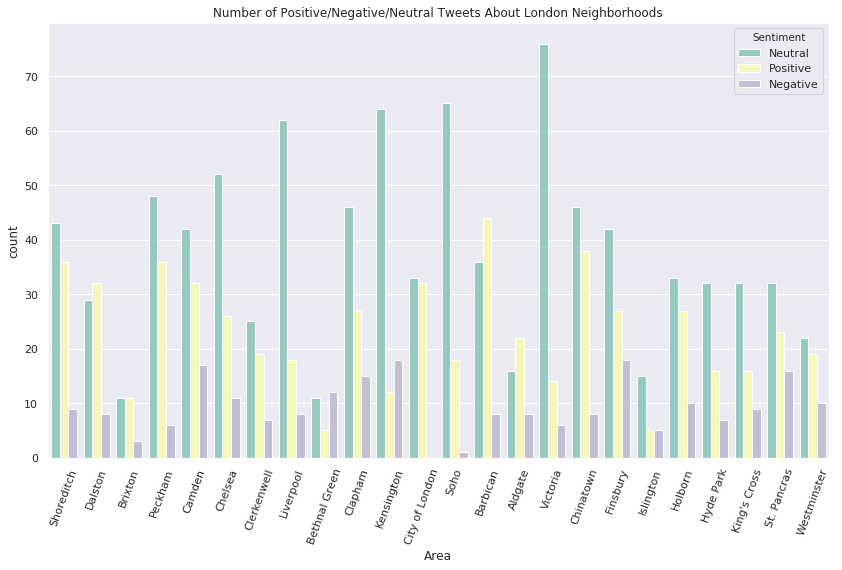

In [168]:
ax = sns.countplot(data=df_total, x="Neighborhood", hue="Sentiment", palette="Set3")
plt.xticks(rotation=70)
plt.title("Number of Positive/Negative/Neutral Tweets About London Neighborhoods")
plt.show()

By this Bar Chart we can see the areas with the highest amounts of
- Positive Tweets: Barbican (Artistic Center), Chinatown (both touristy and full of business which might publish positive tweets), Peckam, Shoreditch, Camden (all gentrified young neighborhoods with much night life, which might be the bulk of the tweets deemed as positive)
- Negative Tweets: Kensington, Finsbury - both are good neighborhoods so it'd be intersting to look further, and St.Pancras - which is Kings Cross train station, implying that it mihgt be all references to problems with public transport rather than the neighborhood.
- Neutral Tweets (general tweets): Victoria, Soho, Kensington, and Liverpool, while they had much fewer 

# Map onto London Map
### Mapping according to neighborhoods centroids GPS coordinates
I will showcase heatmaps of positive and negative tweets from now. The mappings will be not where the tweet was actually captured, since most of them didn't gave a geotag, but the centroid of the neighborhood mentioned in the tweet. 

In [38]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="cda_project")
## Trying out for example:
location = geolocator.geocode("1 Oxford Place, London, UK")
print(location.address)
print(location.longitude, location.latitude)

Adair Paxton, 1, Oxford Place, Steander, Holbeck Urban Village, Leeds, Yorkshire and the Humber, England, LS1 3AX, UK
-1.5505912 53.8002099


So this worked. I now will do this for each neighborhood

In [24]:
lat_dict, lon_dict = {}, {}
# Here I manually choose the most 'interesting' neighborhoods for me
areas = ['Shoreditch','Dalston','Brixton','Peckham','Camden','Chelsea','Clerkenwell','Liverpool',
         'Bethnal Green','Clapham','Kensington','City of London','Soho', 'Barbican', 
         'Aldgate', 'Victoria', 'Chinatown', 'Finsbury', 'Islington', 'Holborn', 'Hyde Park',
         "King's Cross", 'St. Pancras', 'Westminster']

In [27]:
retries = []
for area_name in areas:
    try:
        loc = geolocator.geocode("{}, London, UK".format(area_name))
    except:
        print(area_name, " timed out")
        retries.append(area_name)
        
    if loc:
        print(area_name, " succeeded")
        lon_dict[area_name] = loc.longitude
        lat_dict[area_name] = loc.latitude

lat_dict        

Shoreditch  succeeded
Dalston  succeeded
Brixton  succeeded
Peckham  succeeded
Camden  timed out
Camden  succeeded
Chelsea  succeeded
Clerkenwell  succeeded
Liverpool  succeeded
Bethnal Green  succeeded
Clapham  succeeded
Kensington  succeeded
City of London  succeeded
Soho  succeeded
Barbican  succeeded
Aldgate  succeeded
Victoria  succeeded
Chinatown  succeeded
Finsbury  succeeded
Islington  succeeded
Holborn  succeeded
Hyde Park  succeeded
King's Cross  succeeded
St. Pancras  succeeded
Westminster  succeeded


{'Aldgate': 51.5142477,
 'Barbican': 51.5201501,
 'Bethnal Green': 51.5303456,
 'Brixton': 51.4568044,
 'Camden': 51.4734122,
 'Chelsea': 51.4875417,
 'Chinatown': 51.5116803,
 'City of London': 51.5156177,
 'Clapham': 51.4622924,
 'Clerkenwell': 51.5237268,
 'Dalston': 51.5434023,
 'Finsbury': 51.5265742,
 'Holborn': 51.5176949,
 'Hyde Park': 51.5074889,
 'Islington': 51.5384287,
 'Kensington': 51.4989948,
 "King's Cross": 51.5320529,
 'Liverpool': 53.407154,
 'Peckham': 51.4734122,
 'Shoreditch': 51.5266694,
 'Soho': 51.5131628,
 'St. Pancras': 51.5322906,
 'Victoria': 51.4963688,
 'Westminster': 51.4973206}

In [36]:
# Create new columns in the dataset of each area
df_total['lat'] = df_total['Area'].map(lat_dict)
df_total['lon'] = df_total['Area'].map(lon_dict)
df_total[['Area','lat','lon']].sample(15)

,Area,lat,lon
580,Liverpool,53.407154,-2.991665
558,Liverpool,53.407154,-2.991665
483,Clerkenwell,51.523727,-0.105555
60,Shoreditch,51.526669,-0.079893
780,Kensington,51.498995,-0.199123
212,Peckham,51.473412,-0.069932
840,City of London,51.515618,-0.091998
1468,Hyde Park,51.507489,-0.162195
1419,Holborn,51.517695,-0.119335
988,Barbican,51.520150,-0.098683


## HeatMap using folium

In [41]:
#Set up Folium and heatmap
import folium
from folium import plugins
from folium.plugins import HeatMap
heatmap = folium.Map(location=[df_total.lat.mean(),df_total.lon.mean()], zoom_start = 10) 

### Heatmap of Positive Tweets

In [57]:
heatmap = folium.Map(location=[df_total.loc[df_total.Polarity > 0.05, 'lat'].mean(),df_total.loc[df_total.Polarity > 0.05, 'lon'].mean()], zoom_start = 12)
HeatMap(df_total.loc[df_total.Polarity > 0.5, ['lat', 'lon'] ].values).add_to(heatmap)
heatmap

### Heatmap of Negative Tweets

In [52]:
heatmap = folium.Map(location=[df_total.lat.mean(),df_total.lon.mean()], zoom_start = 10) 
HeatMap(df_total.loc[df_total.Polarity < -0.5, ['lat', 'lon'] ].values).add_to(heatmap)
heatmap

### Conclusion
From the above maps, we can see differences between 'positive' and 'negative' neighborhoods, for example that the southern 'Hip' neighborhoods (Britxton, Clapham) which are going through gentrification as we speak, are only mentioned in positively deemed tweets; and Westminster and the Palace areas are highly positive; while Clerkenwell and Finsbury have the highest concentration of negative tweets. These are interesting to investiagate more rigorously, since this analysis is limited by: 
1. The sentiment analysis quality is not great
2. The location is not precise geolocation
3. The sample is limited and not generalizable to all the thoughts of people about that place.
However, this may still provide preliminary conclusions about sentiments regarding these neighborhoods that should be further investigated.